# Project 2: Combining Two Datasets - A look into NYC Subway Performance v Major Incidents

For this project, I started by looking at the various publicly available datasets from the Metropolitan Transit Authority (MTA), the government body responsible for New York City's subways. From this early research I discoverd two different datasets of interest:

[MTA Subway Terminal On-Time Performance: Beginning 2020](https://data.ny.gov/Transportation/MTA-Subway-Terminal-On-Time-Performance-Beginning-/vtvh-gimj/about_data), shows the measurement of trains arriving at their destination terminals as scheduled. The dataset shows the data broken down by month, train-line, weekend v weekday, the count of on time trips, the count of total scheduled trips, and the percentage of trains arriving as scheduled.
And, [MTA Subway Major Incidents: Beginning 2020](https://data.ny.gov/Transportation/MTA-Subway-Major-Incidents-Beginning-2020/j6d2-s8m2/about_data) which shows the number of major incidents on each subway line, determined as events that delay 50 or more trains causing the most disruption to customers. This dataset has a very similar structure to the first with the data broken down by month, train line, weekend v weekday, category of incident, and count.

With these two datasets as proxies for the overall performance of each subway line I set out to explore the connection between delays and major incidents. My hypothesis was that lines with more delays would be positively correlated with lines with more major inicidents, however, I was also hoping to understand whether there were certain lines that were chroncially underperforming and whether or not that performance was as a result of major incidents or not. To start the process, I began by exploring the on-time performance dataset, cleaning, trimming, and visualizing it until it was in a format that was usable.

In [140]:
import pandas as pd
import plotly.express as px

I began by importing pandas and plotly express, the two packages that I'll use to work with the data. Next, I downloaded the on-time dataset as a csv. I did this because the available export link to the dataset was limited to only 1000 rows whereas the full download was 2596 rows. Because the data didn't have too many rows and is grouped by month, downloading to csv was efficient for this situation. And didn't require the use of the open data API. This does raise the issue of the potential for out-of-date data.

Next, I read the csv into a pandas dataframe.

In [142]:
subway_on_time_performance = pd.read_csv('MTA_subway_performance.csv')
subway_on_time_performance

,month,division,line,day_type,num_on_time_trips,num_sched_trips,terminal_on_time_performance
0,2024-10-01,A DIVISION,1,1,9086,11046,0.822560
1,2024-10-01,A DIVISION,1,2,2381,2720,0.875368
2,2024-10-01,A DIVISION,2,1,5787,7708,0.750778
3,2024-10-01,A DIVISION,2,2,1459,1984,0.735383
4,2024-10-01,A DIVISION,3,2,1372,1852,0.740821
...,...,...,...,...,...,...,...
2591,2020-01-01,B DIVISION,N,1,6673,9843,0.677944
2592,2020-01-01,B DIVISION,Q,1,5854,6910,0.847178
2593,2020-01-01,B DIVISION,Q,2,1765,2222,0.794329
2594,2020-01-01,B DIVISION,R,2,1662,1940,0.856701


In [143]:
subway_on_time_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2596 entries, 0 to 2595
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   month                         2596 non-null   object 
 1   division                      2596 non-null   object 
 2   line                          2596 non-null   object 
 3   day_type                      2596 non-null   int64  
 4   num_on_time_trips             2596 non-null   int64  
 5   num_sched_trips               2596 non-null   int64  
 6   terminal_on_time_performance  2596 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 142.1+ KB


Looking at the dataframe info we can see that the month column is stored as an object and therefore needs to be converted to a datetime.

In [145]:
subway_on_time_performance['month'] = pd.to_datetime(subway_on_time_performance['month'],format='%Y-%m-%d')

In [146]:
subway_on_time_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2596 entries, 0 to 2595
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   month                         2596 non-null   datetime64[ns]
 1   division                      2596 non-null   object        
 2   line                          2596 non-null   object        
 3   day_type                      2596 non-null   int64         
 4   num_on_time_trips             2596 non-null   int64         
 5   num_sched_trips               2596 non-null   int64         
 6   terminal_on_time_performance  2596 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 142.1+ KB


We can now see that the month column is stored as a datetime.
Next, I created a column from the number of on time trips and number of scheduled trips to get a count of the number of delayed trips.

In [148]:
subway_on_time_performance['num_delayed_trips'] = subway_on_time_performance['num_sched_trips'] - subway_on_time_performance['num_on_time_trips']
subway_on_time_performance

,month,division,line,day_type,num_on_time_trips,num_sched_trips,terminal_on_time_performance,num_delayed_trips
0,2024-10-01,A DIVISION,1,1,9086,11046,0.822560,1960
1,2024-10-01,A DIVISION,1,2,2381,2720,0.875368,339
2,2024-10-01,A DIVISION,2,1,5787,7708,0.750778,1921
3,2024-10-01,A DIVISION,2,2,1459,1984,0.735383,525
4,2024-10-01,A DIVISION,3,2,1372,1852,0.740821,480
...,...,...,...,...,...,...,...,...
2591,2020-01-01,B DIVISION,N,1,6673,9843,0.677944,3170
2592,2020-01-01,B DIVISION,Q,1,5854,6910,0.847178,1056
2593,2020-01-01,B DIVISION,Q,2,1765,2222,0.794329,457
2594,2020-01-01,B DIVISION,R,2,1662,1940,0.856701,278


After adding the number of delayed trips column, I created a new dataframe with just the relevant columns.

In [150]:
delayed_trips = subway_on_time_performance[['month','line','num_delayed_trips','num_sched_trips']]
delayed_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2596 entries, 0 to 2595
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   month              2596 non-null   datetime64[ns]
 1   line               2596 non-null   object        
 2   num_delayed_trips  2596 non-null   int64         
 3   num_sched_trips    2596 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 81.3+ KB


Next, I wanted to see what the data looked like when grouped by month. To do this I used the groupby and grouper methods to group the data by month and subway line and then summed the number of delayed trips.

In [152]:
monthly_delayed = delayed_trips.groupby([pd.Grouper(key="month", freq="ME"),'line']).sum()
monthly_delayed = monthly_delayed.reset_index()
monthly_delayed

,month,line,num_delayed_trips,num_sched_trips
0,2020-01-31,1,1703,13604
1,2020-01-31,2,1938,9670
2,2020-01-31,3,1219,8478
3,2020-01-31,4,2072,10514
4,2020-01-31,5,1253,8996
...,...,...,...,...
1322,2024-10-31,Q,1983,10585
1323,2024-10-31,R,1858,8564
1324,2024-10-31,S 42nd,55,14902
1325,2024-10-31,S Fkln,102,7080


Now that the data was grouped by month with the number of delayed trips and number of scheduled trips as separate columns I did another calculation to find the percentage of delayed trips by line and month. This helps to normalize the data and remove any instances where the total number of delayed trips is simply a figure of how many total trips the line had.

In [154]:
monthly_delayed['percent_delayed'] = monthly_delayed['num_delayed_trips']/monthly_delayed['num_sched_trips']
monthly_delayed

,month,line,num_delayed_trips,num_sched_trips,percent_delayed
0,2020-01-31,1,1703,13604,0.125184
1,2020-01-31,2,1938,9670,0.200414
2,2020-01-31,3,1219,8478,0.143784
3,2020-01-31,4,2072,10514,0.197071
4,2020-01-31,5,1253,8996,0.139284
...,...,...,...,...,...
1322,2024-10-31,Q,1983,10585,0.187341
1323,2024-10-31,R,1858,8564,0.216955
1324,2024-10-31,S 42nd,55,14902,0.003691
1325,2024-10-31,S Fkln,102,7080,0.014407


Next, I visualized the monthly data to see if there were any insights that could be gleaned from this grouping.

In [156]:
monthly_delays_graph = px.line(monthly_delayed,
        y = 'percent_delayed',
        x = 'month',
        color = 'line',
        title = 'Monthly Percent of Delayed Subway Trips',
        labels = {
        'percent_delayed': 'Percent of Time Delayed',
},
)

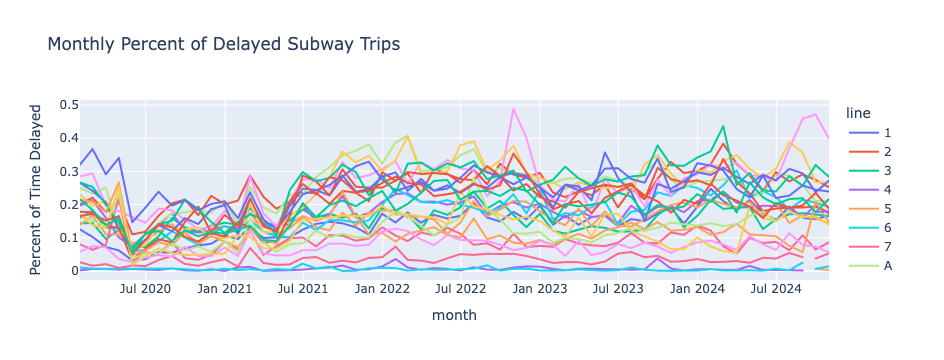

In [157]:
monthly_delays_graph

From the monthly visualization we can see the impact of COVID in early 2020 and we can see that certain lines seem to have a consistently higher number of delays over the four years. That said, the monthly visual is very hard to decipher given the large number of lines and many peaks and valleys. We do see that the B and C lines are very high in the percentage of time delayed.

In search of more clarity, I created another dataframe to group the data by year. For this, I started with the delayed_trips dataframe and regrouped it with the grouper method but this time did it by year instead of month.

In [159]:
yearly_delayed = delayed_trips.groupby([pd.Grouper(key="month", freq="YE"),'line']).sum('num_delayed_trips')
yearly_delayed = yearly_delayed.reset_index()
yearly_delayed['month'] = yearly_delayed['month'].dt.year
yearly_delayed

,month,line,num_delayed_trips,num_sched_trips
0,2020,1,10350,137423
1,2020,2,18841,102720
2,2020,3,10979,90066
3,2020,4,16196,116319
4,2020,5,11139,94102
...,...,...,...,...
114,2024,Q,19366,93442
115,2024,R,18164,84756
116,2024,S 42nd,148,29892
117,2024,S Fkln,146,13876


In [160]:
yearly_delayed = yearly_delayed.rename(columns={'month':'year'})

In [161]:
yearly_delayed

,year,line,num_delayed_trips,num_sched_trips
0,2020,1,10350,137423
1,2020,2,18841,102720
2,2020,3,10979,90066
3,2020,4,16196,116319
4,2020,5,11139,94102
...,...,...,...,...
114,2024,Q,19366,93442
115,2024,R,18164,84756
116,2024,S 42nd,148,29892
117,2024,S Fkln,146,13876


In [162]:
yearly_delayed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   year               119 non-null    int32 
 1   line               119 non-null    object
 2   num_delayed_trips  119 non-null    int64 
 3   num_sched_trips    119 non-null    int64 
dtypes: int32(1), int64(2), object(1)
memory usage: 3.4+ KB


In [163]:
yearly_delayed['year'] = pd.to_datetime(yearly_delayed['year'],format='%Y')

In [164]:
yearly_delayed

,year,line,num_delayed_trips,num_sched_trips
0,2020-01-01,1,10350,137423
1,2020-01-01,2,18841,102720
2,2020-01-01,3,10979,90066
3,2020-01-01,4,16196,116319
4,2020-01-01,5,11139,94102
...,...,...,...,...
114,2024-01-01,Q,19366,93442
115,2024-01-01,R,18164,84756
116,2024-01-01,S 42nd,148,29892
117,2024-01-01,S Fkln,146,13876


In [165]:
yearly_delayed['percent_delayed'] = yearly_delayed['num_delayed_trips']/yearly_delayed['num_sched_trips']
yearly_delayed

,year,line,num_delayed_trips,num_sched_trips,percent_delayed
0,2020-01-01,1,10350,137423,0.075315
1,2020-01-01,2,18841,102720,0.183421
2,2020-01-01,3,10979,90066,0.121899
3,2020-01-01,4,16196,116319,0.139238
4,2020-01-01,5,11139,94102,0.118372
...,...,...,...,...,...
114,2024-01-01,Q,19366,93442,0.207252
115,2024-01-01,R,18164,84756,0.214309
116,2024-01-01,S 42nd,148,29892,0.004951
117,2024-01-01,S Fkln,146,13876,0.010522


With the data now cleaned up, grouped by year and subway line, and the necessary calculations, I set up a visualization to see if anything stands out.

In [167]:
yearly_delays_graph =px.line(yearly_delayed,
        y = 'percent_delayed',
        x = 'year',
        color = 'line',
        title = 'Yearly Percent of Delayed Subway Trips',
        labels = {
        'percent_delayed': 'Percent of Time Delayed',
},
)

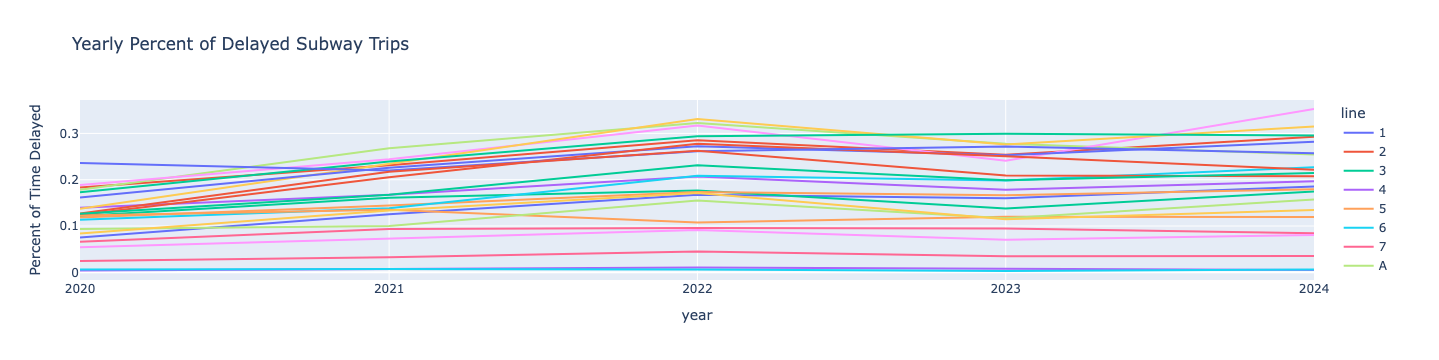

In [168]:
yearly_delays_graph.update_xaxes(
    dtick='M12',
    tickformat='%Y',
)

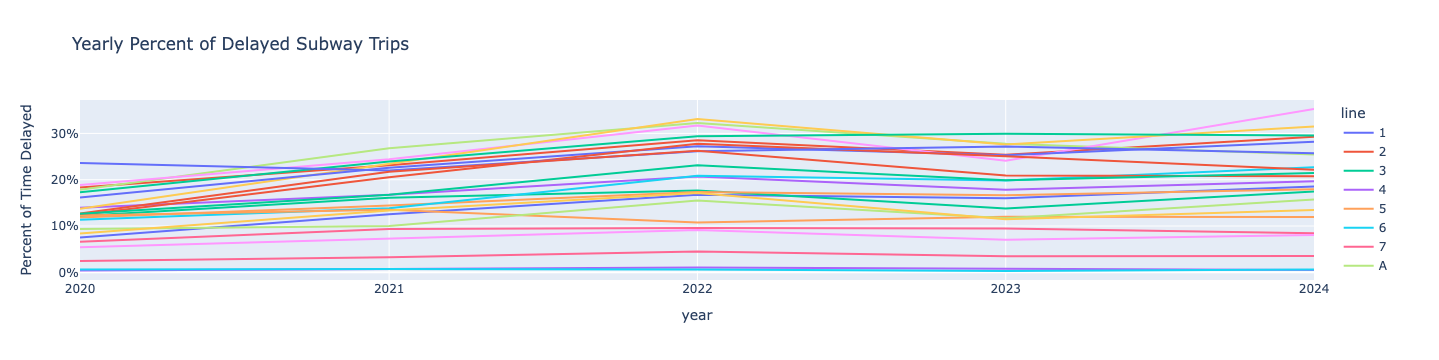

In [169]:
yearly_delays_graph.update_layout(yaxis= {'tickformat': '.0%'})

Looking at the above visual we can see that certain subway lines have been more consistenly delayed as compared to the rest of the system but again the data is hard to decipher. Based on the graph, looking at just 2024 we can see that the B, C, F, 2, and D trains are the most often delayed, however, at other times throughout the past four years the A and N trains have been the most heavily delayed. To dig into the data further, I looked at the amount of change between years for each subway line and added up the absolute value of the year to year change in percetage delayed. While this "naive" approach maybe isn't statistically the best approach, it offers an easy way of finding the subway lines that have had the most fluctuations in percentage of time delayed.

In [171]:
yearly_delayed_sorted = yearly_delayed.sort_values(by = ['line','year'])
yearly_delayed_sorted = yearly_delayed_sorted.reset_index()
yearly_delayed_sorted = yearly_delayed_sorted[['year','line','percent_delayed']]
yearly_delayed_sorted

,year,line,percent_delayed
0,2020-01-01,1,0.075315
1,2021-01-01,1,0.125448
2,2022-01-01,1,0.167448
3,2023-01-01,1,0.159976
4,2024-01-01,1,0.185623
...,...,...,...
114,2023-01-01,R,0.199060
115,2024-01-01,R,0.214309
116,2024-01-01,S 42nd,0.004951
117,2024-01-01,S Fkln,0.010522


After resorting the data I used the pivot method to take the year column and turn the rows that were associated with each year and turned them into columns showing the percentage time delayed for that year and subway line. This allowed me to use the .pct_change method to calculate the year over year change in percent time delayed for each line.

In [172]:
yearly_delayed_sorted = yearly_delayed_sorted.pivot(index='line', columns='year',values='percent_delayed')

In [173]:
yearly_delayed_sorted

year,2020-01-01,2021-01-01,2022-01-01,2023-01-01,2024-01-01
line,,,,,
1,0.075315,0.125448,0.167448,0.159976,0.185623
2,0.183421,0.231422,0.284964,0.253833,0.293002
3,0.121899,0.161240,0.176627,0.137951,0.174349
4,0.139238,0.167351,0.206808,0.178224,0.196635
5,0.118372,0.144209,0.173266,0.166689,0.179475
6,0.113495,0.138585,0.208746,0.198065,0.227141
7,0.065823,0.093394,0.095928,0.094539,0.084414
A,0.178325,0.267759,0.322567,0.277518,0.254446
B,0.188760,0.244393,0.317289,0.241005,0.352703


In [174]:
yearly_pct_changed = yearly_delayed_sorted.pct_change(axis='columns')
yearly_pct_changed

/var/folders/7b/lhrpdd1j6pd65g1hqvwlmfph0000gn/T/ipykernel_35657/1618272965.py:1: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.



year,2020-01-01,2021-01-01,2022-01-01,2023-01-01,2024-01-01
line,,,,,
1,NaN,0.665651,0.334794,-0.044619,0.160316
2,NaN,0.261698,0.231362,-0.109248,0.154311
3,NaN,0.322727,0.095434,-0.218974,0.263850
4,NaN,0.201911,0.235773,-0.138214,0.103299
5,NaN,0.218275,0.201492,-0.037960,0.076706
6,NaN,0.221072,0.506264,-0.051163,0.146798
7,NaN,0.418862,0.027132,-0.014477,-0.107102
A,NaN,0.501523,0.204694,-0.139659,-0.083134
B,NaN,0.294728,0.298272,-0.240425,0.463467


In [175]:
yearly_pct_changed = yearly_pct_changed.abs()

In [176]:
yearly_pct_changed['total'] = yearly_pct_changed.sum(axis=1)

In [177]:
yearly_pct_changed.sort_values(by='total',ascending = False)

year,2020-01-01 00:00:00,2021-01-01 00:00:00,2022-01-01 00:00:00,2023-01-01 00:00:00,2024-01-01 00:00:00,total
line,,,,,,
GS,NaN,0.147127,0.172265,0.513682,1.067445,1.900520
FS,NaN,0.848601,0.397258,0.239424,0.370665,1.855947
C,NaN,0.711540,0.411242,0.167497,0.142302,1.432581
M,NaN,0.589263,0.280529,0.330755,0.176201,1.376748
B,NaN,0.294728,0.298272,0.240425,0.463467,1.296891
E,NaN,0.654008,0.352490,0.096247,0.117133,1.219878
J,NaN,0.072232,0.550762,0.249308,0.347249,1.219550
1,NaN,0.665651,0.334794,0.044619,0.160316,1.205380
Q,NaN,0.712068,0.210895,0.204924,0.008120,1.136006


After getting the percetage change I used the absolute value and sum methods to generate a new column to sum up the total percentage change across the four years. Comparing the results from the percent change data there are 7 lines that are over 2.0 in total percent change over the four years. We see some outliers like the FS and GS in this group that we can eliminate by comparing to the orignial yearly visual which shows these lines are clustered towards the very bottom of the graph. The C, 1, B, M, and E lines all show larger swings in the year over year percent change in delayed trips.

Given that the C and B trains show a high percent of time delayed in 2024, based on the yearly graph, and they rank highly among the lines that are experiencing changes in the amount of delays year over year, I decided to specifically look at those two lines compared to the major incidents they have experienced. To start we have to bring in the incidents data.

In [179]:
incidents = pd.read_csv('MTA_subway_major_incidents.csv')
incidents

,month,division,line,day_type,category,count
0,2024-10-01,A DIVISION,1,1,Signals,3
1,2024-10-01,A DIVISION,1,1,Other,1
2,2024-10-01,A DIVISION,1,1,Persons on Trackbed/Police/Medical,1
3,2024-10-01,A DIVISION,2,1,Other,1
4,2024-10-01,A DIVISION,2,1,Signals,1
...,...,...,...,...,...,...
1917,2020-01-01,B DIVISION,N,1,Subway Car,1
1918,2020-01-01,B DIVISION,N,2,Other,1
1919,2020-01-01,B DIVISION,R,1,Other,2
1920,2020-01-01,B DIVISION,R,1,Signals,2


In [180]:
incidents['month'] = pd.to_datetime(incidents['month'],format='%Y-%m-%d')
incidents = incidents.rename(columns={'month':'year'})

In [181]:
incidents = incidents[['year','line','count']]
incidents

,year,line,count
0,2024-10-01,1,3
1,2024-10-01,1,1
2,2024-10-01,1,1
3,2024-10-01,2,1
4,2024-10-01,2,1
...,...,...,...
1917,2020-01-01,N,1
1918,2020-01-01,N,1
1919,2020-01-01,R,2
1920,2020-01-01,R,2


In [182]:
incidents = incidents.groupby([pd.Grouper(key="year", freq="YE"),'line']).sum('count')
incidents = incidents.reset_index()
incidents['year'] = incidents['year'].dt.year

In [183]:
incidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    108 non-null    int32 
 1   line    108 non-null    object
 2   count   108 non-null    int64 
dtypes: int32(1), int64(1), object(1)
memory usage: 2.2+ KB


In [184]:
incidents['year'] = pd.to_datetime(incidents['year'],format='%Y')
incidents

,year,line,count
0,2020-01-01,1,11
1,2020-01-01,2,29
2,2020-01-01,3,19
3,2020-01-01,4,22
4,2020-01-01,5,16
...,...,...,...
103,2024-01-01,N,57
104,2024-01-01,Q,18
105,2024-01-01,R,29
106,2024-01-01,S 42nd,5


In [185]:
yearly_subway_incidents_graph = px.line(incidents,
        y = 'count',
        x = 'year',
        color = 'line',
        title = 'Yearly Count of Major Subway Incidents',
        labels = {
        'count': 'Count of Incidents',
},
)

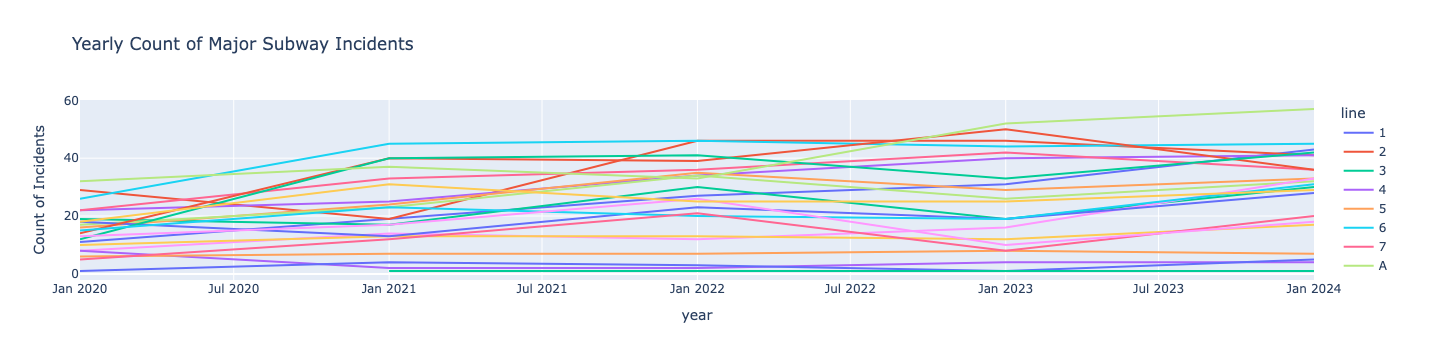

In [186]:
yearly_subway_incidents_graph

With the incidents data we perform similar transformations like the ones we did for the delays data in order to produce a year over year visual. It is difficult to see but looking just at the 2024 data, we can see that the B and C lines are not towards the very top of the total amount of incidents compared to other subway lines. That might indicate that the line is delayed for other reasons.

In [187]:
incidents = incidents.sort_values(by = ['line','year'])

In [188]:
incidents = incidents.reset_index()
incidents

,index,year,line,count
0,0,2020-01-01,1,11
1,21,2021-01-01,1,19
2,44,2022-01-01,1,27
3,65,2023-01-01,1,31
4,86,2024-01-01,1,43
...,...,...,...,...
103,85,2023-01-01,S 42nd,1
104,106,2024-01-01,S 42nd,5
105,42,2021-01-01,S Fkln,3
106,43,2021-01-01,S Rock,1


In [189]:
yearly_delayed_trim = yearly_delayed[['year','line','percent_delayed']].sort_values(by = ['line','year'])

In [190]:
yearly_delayed_trim = yearly_delayed_trim.reset_index()

In [191]:
yearly_delayed_trim

,index,year,line,percent_delayed
0,0,2020-01-01,1,0.075315
1,23,2021-01-01,1,0.125448
2,46,2022-01-01,1,0.167448
3,69,2023-01-01,1,0.159976
4,92,2024-01-01,1,0.185623
...,...,...,...,...
114,91,2023-01-01,R,0.199060
115,115,2024-01-01,R,0.214309
116,116,2024-01-01,S 42nd,0.004951
117,117,2024-01-01,S Fkln,0.010522


Once the incidents data and delays data are formatted in the same way I merged the two datasets together to be able to produce a visual showing the data together.

In [192]:
merged = pd.merge(yearly_delayed_trim,incidents,how='inner',on=['year','line'])

In [193]:
merged

,index_x,year,line,percent_delayed,index_y,count
0,0,2020-01-01,1,0.075315,0,11
1,23,2021-01-01,1,0.125448,21,19
2,46,2022-01-01,1,0.167448,44,27
3,69,2023-01-01,1,0.159976,65,31
4,92,2024-01-01,1,0.185623,86,43
...,...,...,...,...,...,...
93,68,2022-01-01,R,0.231471,63,25
94,91,2023-01-01,R,0.199060,84,25
95,115,2024-01-01,R,0.214309,105,29
96,116,2024-01-01,S 42nd,0.004951,106,5


In [194]:
bc_train_data = merged[merged['line'].isin(['B','C'])]

In [195]:
bc_train_incidents_delays_graph = px.scatter(bc_train_data,
                                            x='percent_delayed',
                                            y='count',
                                            color='line',
                                            title = 'B & C Train Percent of Delays Against Count of Major Incidents',
                                            labels = {
                                            'percent_delayed': 'Percent of Time Delayed','count':'Count of Major Incidents'}
                                           )

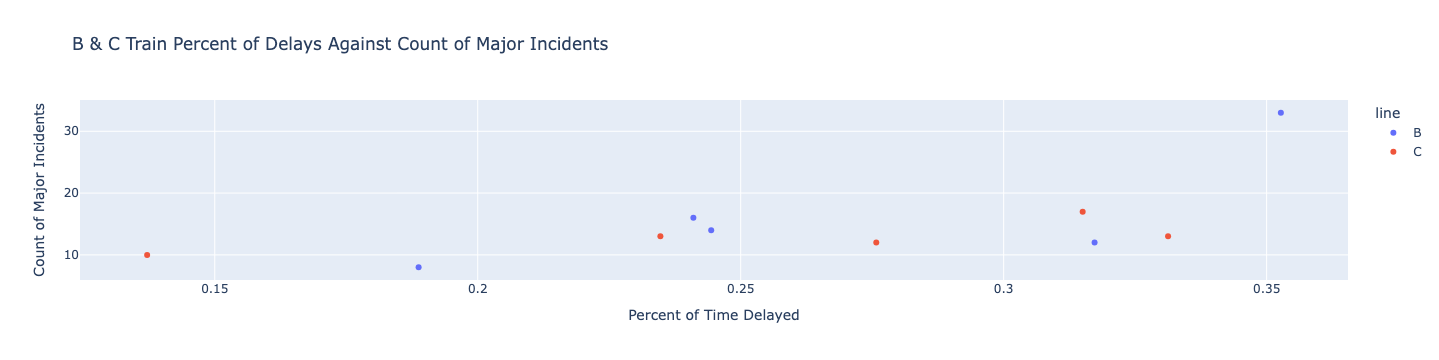

In [196]:
bc_train_incidents_delays_graph

In [197]:
bc_train_incidents_delays_graph = bc_train_incidents_delays_graph.update_layout(xaxis= {'tickformat': '.0%'})

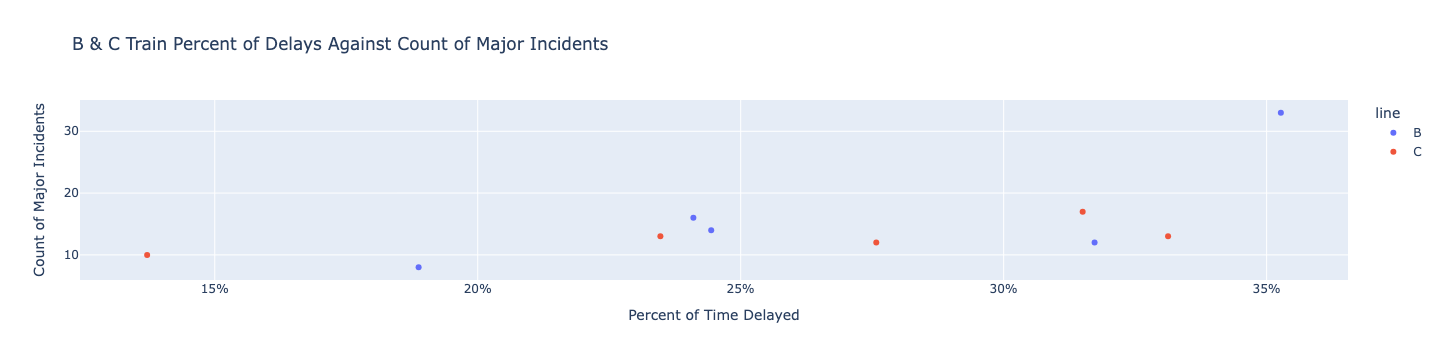

In [198]:
bc_train_incidents_delays_graph

Here we see the B and C trains plotted together as a scatterplot of the count of major incidents and the percentage of time delayed. Althought there is some indication of a positive correlation between the incidents and percent of time dealyed, we can see for the B train that there are times when the count of incidents is less than 20 yet the percentage of time delayed is over 30%.

Digging into the B train more closely I plotted just the B train overtime with two y-axes showing the count of major incidents and the percentage of time delayed.

In [199]:
b_train_data = merged[merged['line']=='B']
b_train_data

,index_x,year,line,percent_delayed,index_y,count
40,8,2020-01-01,B,0.188760,8,8
41,31,2021-01-01,B,0.244393,29,14
42,54,2022-01-01,B,0.317289,52,12
43,77,2023-01-01,B,0.241005,73,16
44,100,2024-01-01,B,0.352703,94,33


In [200]:
b_train_graph = px.line(b_train_data,
        y = 'count',
        x = 'year',
        color = 'line',
        title = 'Yearly Count of Major Subway Incidents',
        labels = {
        'count': 'Count of Incidents',
},
)

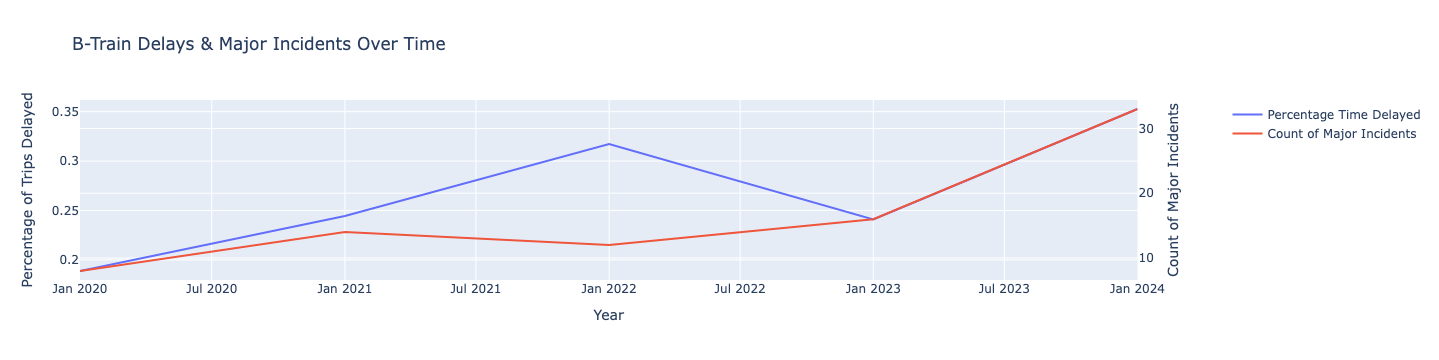

In [201]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

b_train_graph = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
b_train_graph.add_trace(
    go.Scatter(x=b_train_data['year'], y=b_train_data['percent_delayed'],mode='lines', name="Percentage Time Delayed"),
    secondary_y=False,
)

b_train_graph.add_trace(
    go.Scatter(x=b_train_data['year'], y=b_train_data['count'],mode='lines', name="Count of Major Incidents"),
    secondary_y=True,
)

# Add figure title
b_train_graph.update_layout(
    title_text="B-Train Delays & Major Incidents Over Time"
)

# Set x-axis title
b_train_graph.update_xaxes(title_text="Year")

# Set y-axes titles
b_train_graph.update_yaxes(title_text="Percentage of Trips Delayed", secondary_y=False)
b_train_graph.update_yaxes(title_text="Count of Major Incidents", secondary_y=True)

b_train_graph.show()

Judging by the above visual we can see that there seems to have been an inflection point in 2023 where the number of incidents and the percentage of time delayed is increasing together. That said, in previous years, there have been times where there are fewer major incidents and more time delayed. Possibly the B train is experiencing worsening performance but it would likely need more close monitoring and analysis to be certain.